# Анализ убытков приложения ProcrastinatePRO+ 

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- Лог сервера с данными об их посещениях;
- Выгрузка их покупок за этот период;
- Рекламные расходы.

Предстоит изучить:

- Откуда приходят пользователи и какими устройствами они пользуются;
- Сколько стоит привлечение пользователей из различных рекламных каналов;
- Сколько денег приносит каждый клиент;
- Когда расходы на привлечение клиента окупаются;
- Какие факторы мешают привлечению клиентов.

# Шаг 1. Загрузка данных и подготовка их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа.

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),
    pd.read_csv('orders_info_short.csv'),
    pd.read_csv('costs_info_short.csv'))

Выведем на экран первые 5 строк каждой таблицы.

In [2]:
display(visits.head())
display(orders.head())
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Просмотрим тип данных, а так же есть ли пропущенные значения.

In [3]:
visits.info()
print('-------------------------------------')
orders.info()
print('-------------------------------------')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeI

Приведем название столбцов к единому регистру.

In [4]:
visits.rename(columns = {'User Id':'user_id','Region':'region','Device':'device','Channel':'channel','Session Start':'session_start','Session End':'session_end'}, inplace = True) 
orders.rename(columns = {'User Id':'user_id','Event Dt':'event_dt','Revenue':'revenue'}, inplace = True) 
costs.rename(columns = {'Channel':'channel'}, inplace = True) 

Проверим число дубликатов.

In [5]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Заменим тип данных.

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [7]:
visits.info()
print('-------------------------------------')
orders.info()
print('-------------------------------------')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), f

Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

- `User Id` — уникальный идентификатор пользователя
- `Device` — категория устройства пользователя
- `Session start` — дата и время начала сессии
- `Session End` — дата и время окончания сессии
- `Channel` — идентификатор рекламного источника, из которого пришел пользователь
- `Region` - страна пользователя

Таблица orders_log_short (информация о заказах):

- `User Id` — уникальный id пользователя, который сделал заказ
- `Event Dt` — дата и время покупки
- `Revenue` — выручка

Таблица costs_short (информация о затратах на маркетинг):

- `Channel` — идентификатор рекламного источника
- `Dt` — дата
- `Costs` — затраты на этот рекламный источник в этот день

**Вывод**

- Явных пропусков в таблицах нет;
- Дубликаты не обнаружены;
- Названия столбцов приведены к единому регистру.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Хорошая работа! Все основные действия по предобработке произведены, здорово, что ты не забыла проверить данные на наличие дубликатов.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
        
Несколько рекомендаций:

* если мы только привели преобразование в строчные символы и заменили пробел на знак `_`, то мы можем использовать такой подход:
    
`visits.columns = visits.columns.str.lower().str.replace(' ', '_')`

также интересным является подход с использованием list comprehensions:
        
`visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]` 
        
* для переименования колонок можно также использовать метод `set_axis()`  (альтернатива `rename()`)
        
       
https://www.stackvidhya.com/rename-columns-in-pandas/

* важно проверять данные не только на наличие полных дубликатов; также я бы порекомендовала проводить проверки качества данных, проверять уникальные значения, общие статистики, ошибочные значения, минимумы и максимумы.


# Шаг 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии

Добавим функцию `get_profiles()` для создания пользовательских профилей

In [8]:
def get_profiles(sessions, orders, ad_costs): 

    # сортируем сессии по ID пользователя и дате первого посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'channel': 'first', 'device': 'first', 'region': 'first',
            })
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
        # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

Добавим функцию `get_retention()` для рассчета удержания

In [9]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Добавим функцию `get_conversion()` для расчёта конверсии

In [10]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Добавим функцию `get_ltv()` для расчёта LTV и ROI

In [11]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

А также функции для визуализации этих метрик — `filter_data()`, `plot_retention()`, `plot_conversion()` и `plot_ltv_roi()`.

In [12]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [13]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [14]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [15]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 3. Исследовательский анализ данных

Ответим на следующие вопросы:
- **Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?**
- **Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?**
- **По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?**

Для начала построим профили пользователей.

In [16]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


А так же определим минимальную и максимальную дату привлечения пользователей.

In [39]:
print('Минимальная дата привлечения:', profiles['dt'].min())
print('Максимальная дата привлечения:', profiles['dt'].max())

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Тут все верно, но я бы предложила оформить результаты, например, вот так:
    
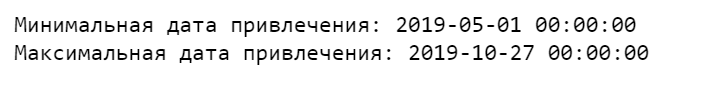

Построим таблицу распределения пользователей по странам.

In [18]:
profiles_payer = profiles[profiles['payer'] == True]
country_group = profiles.groupby('region').agg({'user_id':'count'})
country_group['payer'] = profiles_payer.groupby('region').agg({'user_id':'count'})
country_group['%'] = country_group['payer'] / country_group['user_id']
country_group.columns = ['Всего ','Платных', '% Платящих']
country_group.sort_values(by = '% Платящих', ascending = False).style.format({'% Платящих':'{:.2%}'})

,Всего,Платных,% Платящих
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


Построим таблицу распределения пользователей по типу устройств.

In [19]:
device_group = profiles.groupby('device').agg({'user_id':'count'})
device_group['payer'] = profiles_payer.groupby('device').agg({'user_id':'count'})
device_group['proportion'] = device_group['payer'] / device_group['user_id']
device_group.columns = ['Всего ','Платных', '% Платящих']
device_group.sort_values(by = '% Платящих', ascending = False).style.format({'% Платящих':'{:.2%}'})

,Всего,Платных,% Платящих
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


Построим таблицу распределения пользователей по каналам.

In [20]:
ad_group = profiles.groupby('channel').agg({'user_id':'count'})
ad_group['payer'] = profiles_payer.groupby('channel').agg({'user_id':'count'})
ad_group['proportion'] = ad_group['payer'] / ad_group['user_id']
ad_group.columns = ['Всего ','Платных', '% Платящих']
ad_group.sort_values(by = '% Платящих', ascending = False).style.format({'% Платящих':'{:.2%}'})

,Всего,Платных,% Платящих
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


**Выводы**

**Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?**

Пользователи приложения приходят из следующих стран: 
- США; 
- Великобритания; 
- Германия;
- Франция.

Больше всего пользователей приложения из США - 100 тыс. чел., это более 60% от общего количества пользователей. Доля платящих пользователей так же самая большая в США - 6,9%.

**Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?**

Пользователи пользуются следующими устройствами:
- Mac;
- iPhone;
- Android;
- PC.

Больше платных пользователей заходит через `Mac` (6,4%) и `iPhone` (6,2%).

**По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?**

Пользователей привлекали по следующим рекламным каналам:
- FaceBoom;
- AdNonSense;
- lambdaMediaAds;
- TipTop;
- RocketSuperAds;
- WahooNetBanner;
- YRabbit;
- MediaTornado;
- LeapBob;
- OppleCreativeMedia;
- organic.

Больше всего пользователей приходят по каналу `organic` (37% от общего числа привлеченных), но платящих пользователей больше регистрируется через `FaceBoom` (12,2%)

# Шаг 4. Маркетинг

Ответим на следующие вопросы:

- **Сколько денег потратили? Всего / на каждый источник / по времени**
- **Сколько в среднем стоило привлечение одного покупателя из каждого источника?**

Посчитаем общую сумму расходов на маркетинг.

In [21]:
profiles['acquisition_cost'].sum().round(1)

105497.3

Построим таблицу распределения трат по источникам.

In [22]:
spending_by_channel = profiles.groupby('channel').agg({'acquisition_cost': 'sum'})
spending_by_channel.columns = ['Расходы']
spending_by_channel.sort_values(by='Расходы', ascending=False).round(1)

,Расходы
channel,
TipTop,54751.3
FaceBoom,32445.6
WahooNetBanner,5151.0
AdNonSense,3911.2
OppleCreativeMedia,2151.2
RocketSuperAds,1833.0
LeapBob,1797.6
lambdaMediaAds,1557.6
MediaTornado,954.5


Построим график распределения трат по времени.

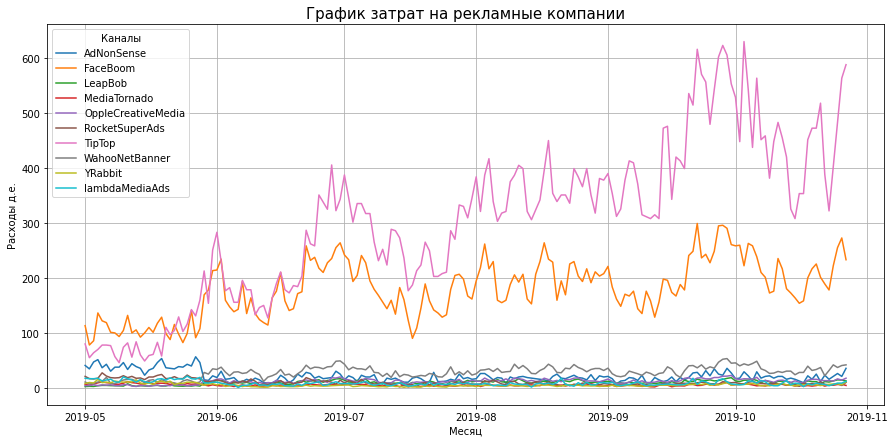

In [40]:
costs.pivot_table(index='dt', # даты посещений
    columns='channel', # источники переходов
    values='costs', # канал
    aggfunc='median').plot(grid=True, figsize=(15, 7), legend=True)
plt.title('График затрат на рекламные компании', fontsize = 15)
plt.xlabel('Месяц')
plt.ylabel('Расходы д.е.')
plt.legend(fontsize = 10, title = 'Каналы')

plt.show()

----

In [24]:
mean_channel = profiles_payer.groupby('channel').agg({'acquisition_cost':'mean'})
mean_channel.columns = ['Среднее']
mean_channel.sort_values(by='Среднее', ascending=False).round(2)

,Среднее
channel,
TipTop,2.79
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.74
WahooNetBanner,0.60
RocketSuperAds,0.42
OppleCreativeMedia,0.25
MediaTornado,0.22
YRabbit,0.21


Исключим источник `organic` (органический трафик), что бы не искажать средний показатель, так как он не требует затрат.

In [25]:
new_profiles = profiles.query('channel != "organic"')

In [26]:
new_profiles['acquisition_cost'].mean().round(2)

1.13

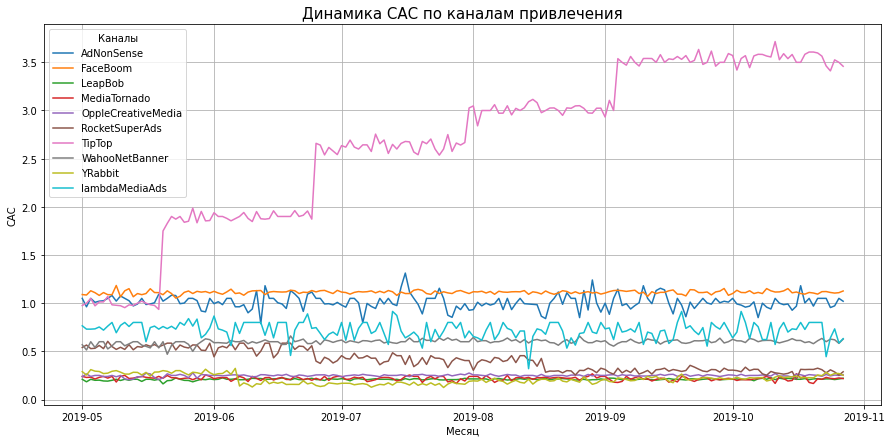

In [27]:
mean_channel = new_profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')
mean_channel.plot(figsize = (15,7), grid = True)
plt.title('Динамика САС по каналам привлечения', fontsize = 15)
plt.xlabel('Месяц')
plt.ylabel('САС')
plt.legend(fontsize = 10, title = 'Каналы')

Стоимость привлечения клиентов через канал `TipTop` за полгода выросла в 3 раза, в то время, как для остальных каналов она осталась стабильной. Интересно то, что по каналу `FaceBoom` больше конверсия в платных пользователей, при стабильных расходах.

**Вывод**
- Всего на маркетинг потрачено 105 497 д.е;
- В среднем стоимость привлечения пользователя - 1.1 д.е;
- Самый дорогой по привлечению пользователь по каналу - TipTop (2.8).

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. 
Текущая дата - 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 
Ранее мы уже исключили органический трафик, т.к. он не подразумевает расходов. 

Ответим на следующие вопросы:
- **Окупается ли реклама, направленная на привлечение пользователей в целом?**
- **Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**
- **Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.**

### Проанализируем общую окупаемость рекламы

Зададим момент и горизонт анализа

In [28]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

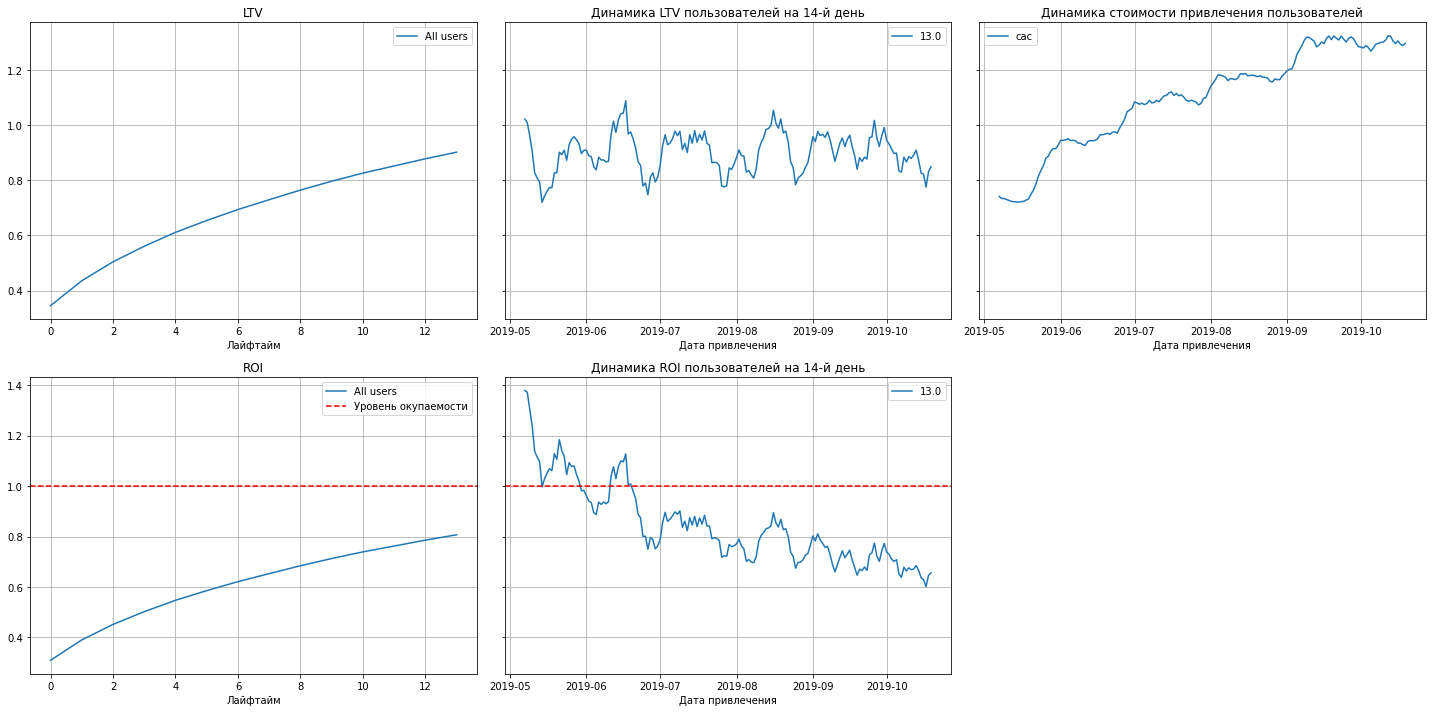

In [29]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- В течении двух недель реклама не окупилась, не хватило примерно 20%; 
- Показатель ROI падает с июня месяца, возможно причина в росте стоимости пользователя(САС);
- Динамика LTV колеблется на уровне 0.9. 

### Проанализируем окупаемость рекламы с разбивкой по устройствам

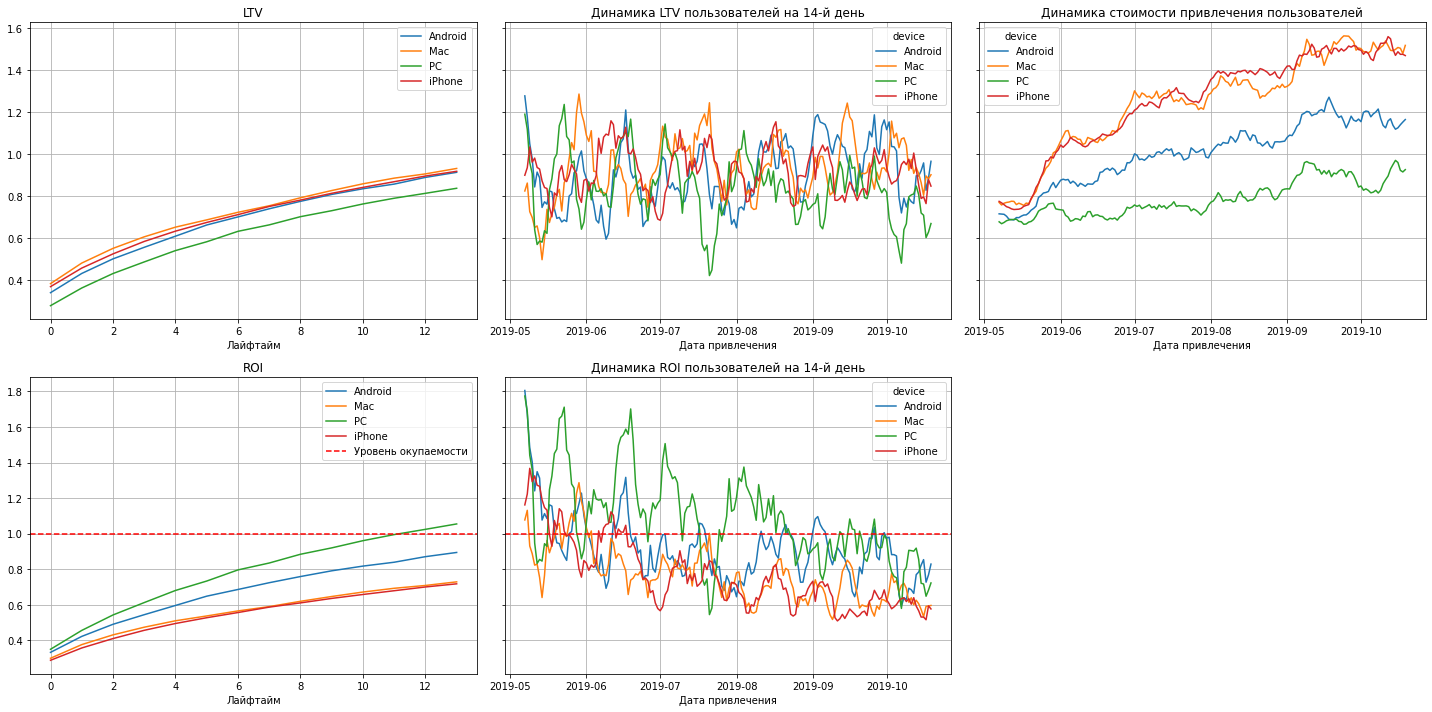

In [30]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days, dimensions = ['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- За две недели вышли на окупаемость только пользователи на `PC`;
- Стоимость привлечения стабильно растёт для всех устройств. Для пользователей `Mac` и `iPhone`стоимость привлечения сама дорогая.

### Проанализируем окупаемость рекламы с разбивкой по странам

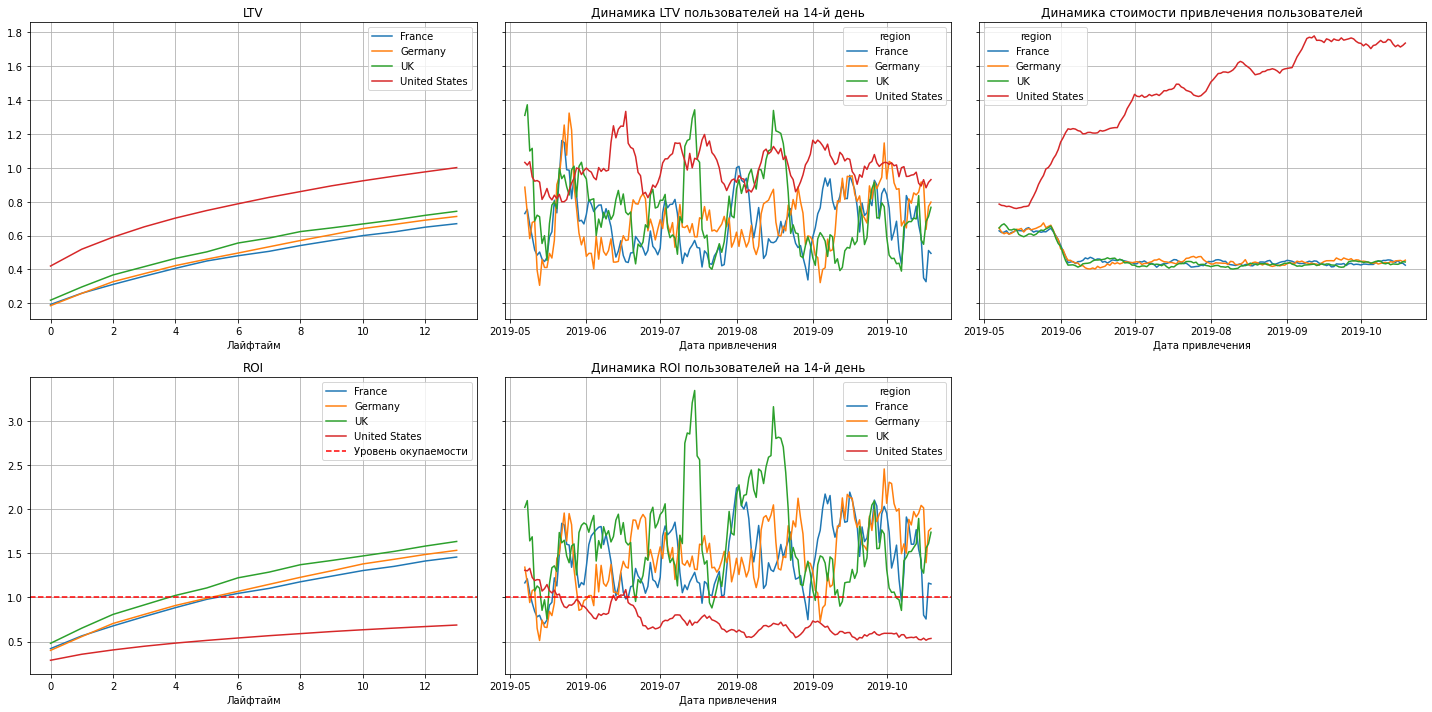

In [31]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days, dimensions = ['region'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Как мы выяснили ранее большая часть аудитории - пользователи из США(<60%), возможно неокупаемость связана с большими затратами на рекламу, для пользователей данной страны.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

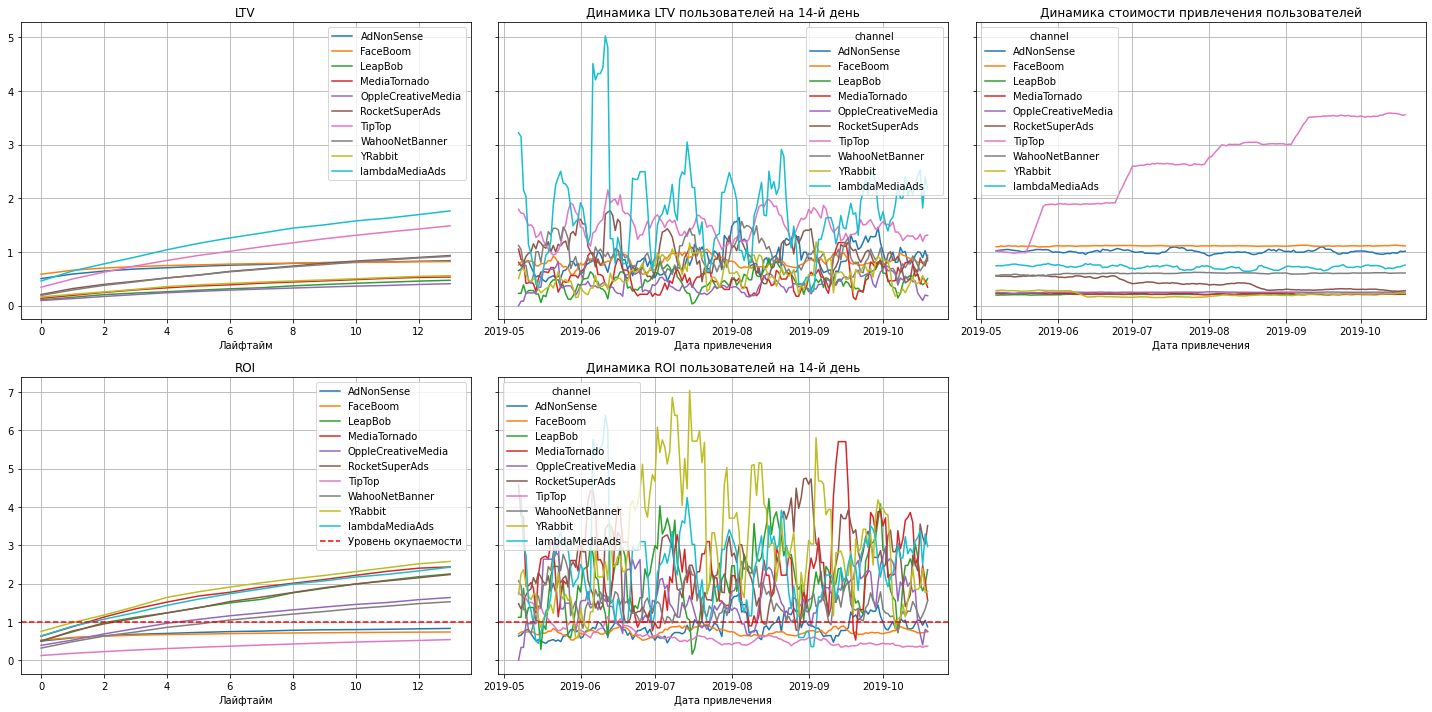

In [32]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Не окупаются затраты на источники `AdNonSense`, `FaceBoom` и `TipTop`;
- При этом стоимость привлечения пользователей из `TipTop` растет.

**Выводы** 

Причины не окупаемости рекламы могут быть следующими:
 - Высокая стоимость рекламы по устройствам - `Mac`, `iPhone`;
 - Высокая стоимость по рекламы по каналам - `TipTop`;
 - Высокая стоимость пользователей из США (составляют < 60% пользователей приложения).
 
 ---

### Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Построим графики конверсии и удержания по устройствам

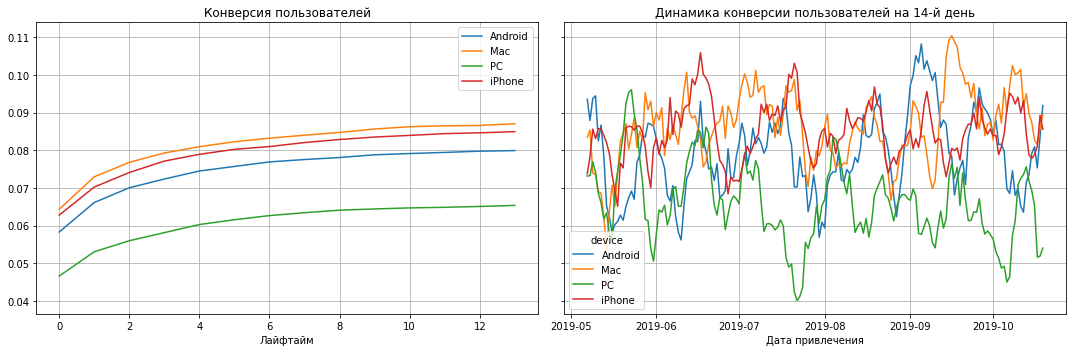

In [33]:
# Конверсия по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    new_profiles, orders, observation_date, horizon_days, dimensions = ['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

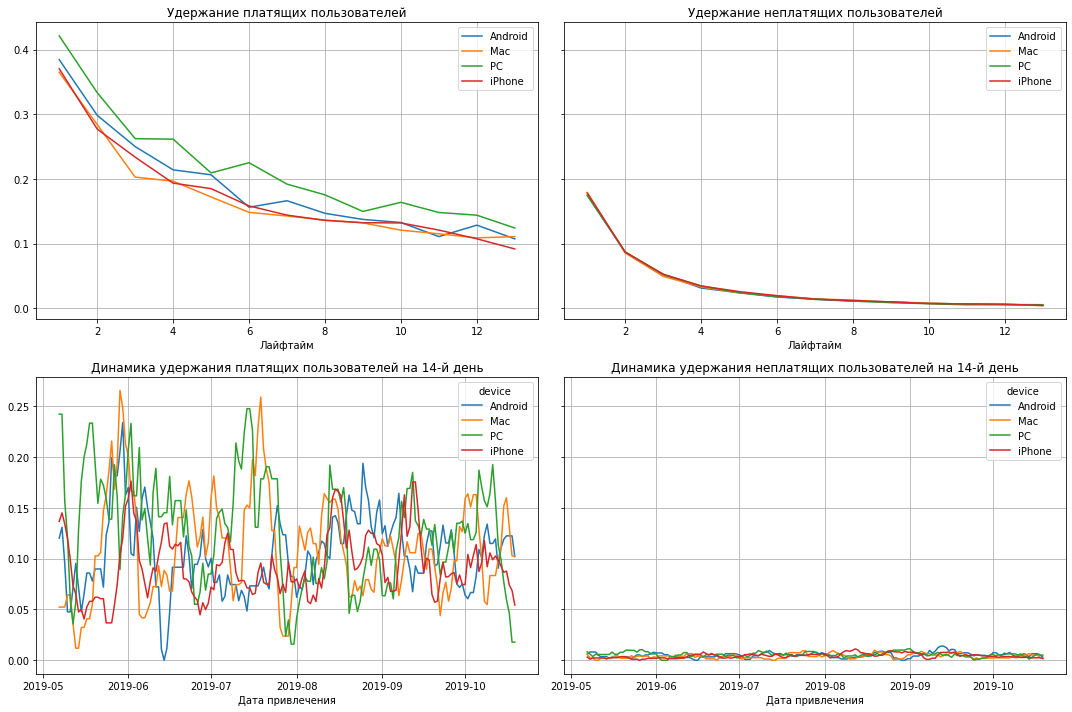

In [34]:
# Удержание по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    new_profiles, visits, observation_date, horizon_days, dimensions = ['device'])

plot_retention(retention_grouped, retention_history, horizon_days) 

- Пользователи `Mac` и `iPhone` показывают высокую конверсию и низкое удержание;
- У пользователей `PC` высокое удержание и низкая конверсия.
----

Построим графики конверсии и удержания по странам

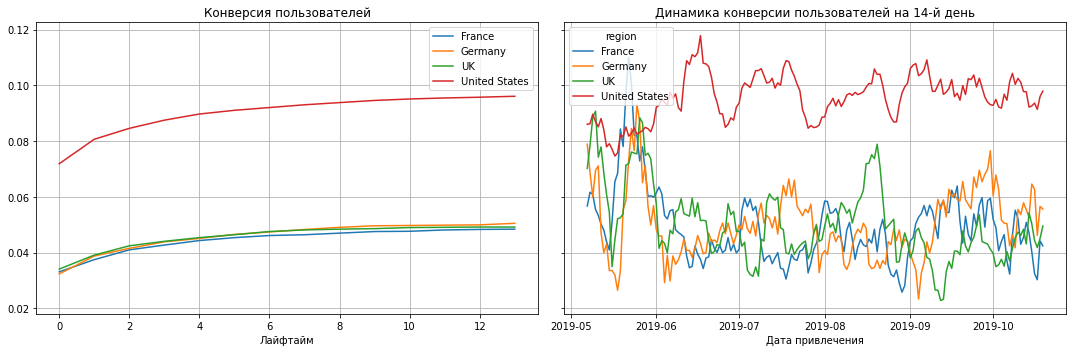

In [35]:
# Конверсия по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    new_profiles, orders, observation_date, horizon_days, dimensions = ['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

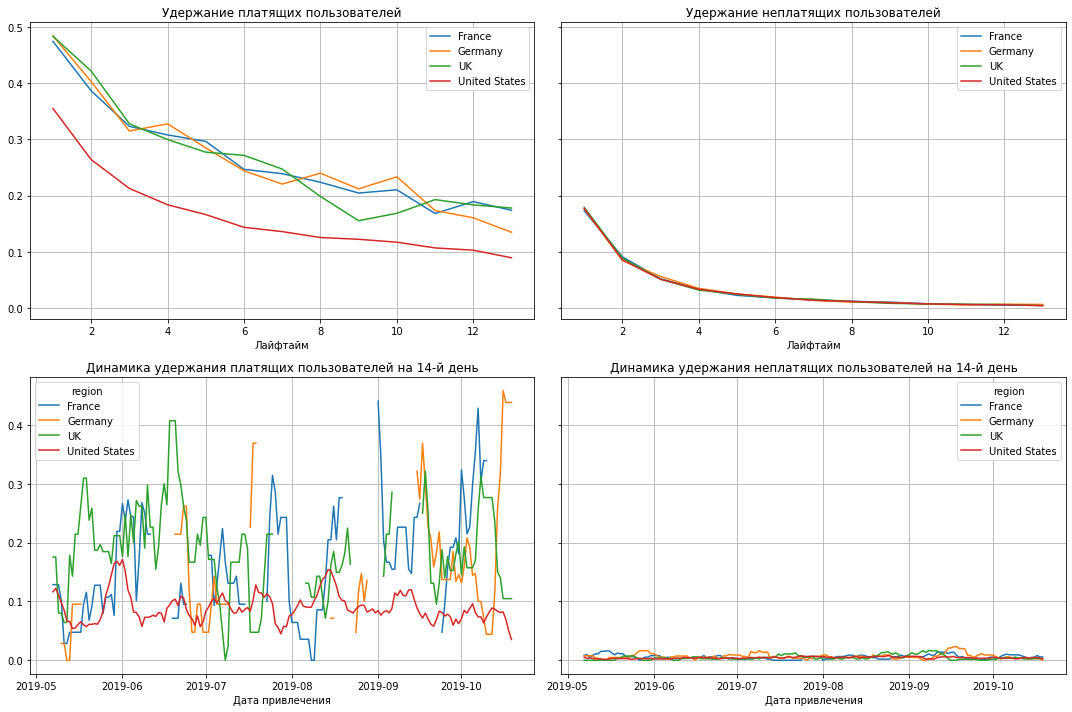

In [36]:
# Удержание по странам
retention_raw, retention_grouped, retention_history = get_retention(
    new_profiles, visits, observation_date, horizon_days, dimensions = ['region'])

plot_retention(retention_grouped, retention_history, horizon_days) 

- У пользователей из США хорошая конверсия, но плохое удержание. Возможно из-за высокой стоимости привлечения и низкого удержания рекламная компания не окупается.
----

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Верно: в случае США дело в удержании, а не конверсии.

Построим графики конверсии и удержания по рекламным каналам

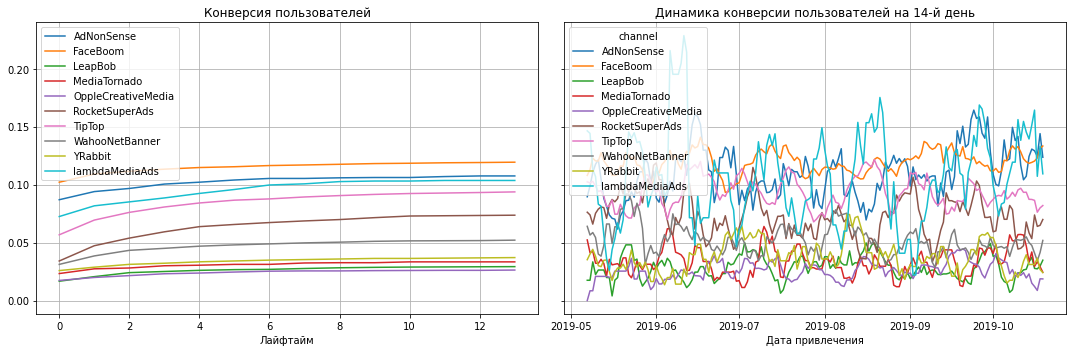

In [37]:
# Конверсия по рекламным каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    new_profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

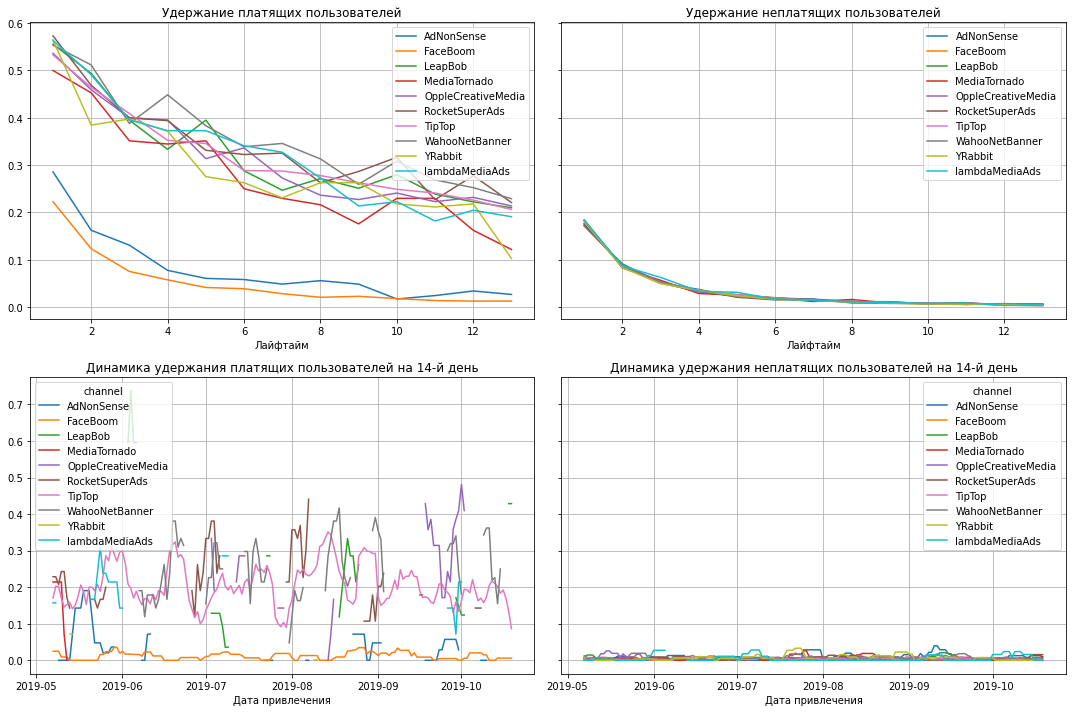

In [38]:
# Удержание по рекламным каналам
retention_raw, retention_grouped, retention_history = get_retention(
    new_profiles, visits, observation_date, horizon_days, dimensions = ['channel'])

plot_retention(retention_grouped, retention_history, horizon_days) 

На графике "Динамика удержания платящих пользователей на 14-й день" видны пробелы, возможно из-за недостатка данных.

- Удержание по каналу `FaceBoom` очень низкое, учитывая расходы на привлечение пользователей;
- Удержание по каналу `TipTop` нормальное, но учитывая расходы на привлечение, точно не пропорциональное.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 



# Шаг 6. Выводы

**Причины неэффективности привлечения пользователей**

1. Не окупается реклама для `Мас` и `iPhone` из - за высокой стоимости привлечения клиентов.
2. Низкий процент удержания пользователей из США.
3. Вложение в неокупающиеся каналы, такие как:
- `TipTop`(54 751 д.е.(~50% от общих затрат));
- `FaceBoom` (32 445 д.е.(~30% от общих затрат)). 

Возможно причина в аудитории данных ресурсов.

**Рекомендации для отдела маркетинга**

Основная аудитория это - пользователи из США, где уровень окупаемости рекламы низкий, при этом стоимость привлечения людей из этой страны высокая. Лучше попробовать равномерно и пропорционально распределить затраты на рекламу по странам, чем концентрироваться на одной.

Необходимо пересмотреть сумму затрат на рекламные компании по ресурсам `TipTop` и `FaceBoom`. А так же составить портрет целевой аудитории данных приложений, в которых проводятся рекламные компании, возможно это не наши пользователи. В качестве альтернативы, можно увеличить рекламный бюджет по каналам `YRabbit`, `RocketSuperAds` или `OppleCreativeMedia`.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Очень здорово, что ты в итоговом выводе порекомендовала альтернативные каналы, которые могут прийти на смену убыточным. 

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Дарья, спасибо за твой проект! Ты приложила много усилий, чтобы довести его до конца,фактически все задачи в рамках проекта тебе удалось успешно решить, это видно невооруженным глазом, отличная работа! У меня нет критичных замечаний к твоему проекту, только рекомендации, которые ты сможешь посмотреть самостоятельно, их совсем немного:)

**Отмечу отдельные положительные моменты проекта🙂**:
* На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
* Ты активно работала с визуализацией, хорошо, что ты не избегаешь этого инструмента для анализа! 
* Ты использовала разные методы для работы с данными, круто, что ты владеешь ими и можешь применять на практике.
* Плюс за то, что уделила внимание оформлению проекта, оставляла подробные выводы и интерпретации, виден твой аналитический подход к решению поставленной задачи.
    
Спешу тебе сообщить, что твой проект принят, и ты можешь перейти на следующий спринт!
    
**Желаю тебе крутых и интересных проектов на следующих спринтах!**😉
    
![gif](https://media.giphy.com/media/VTtANKl0beDFQRLDTh/giphy.gif)